In [122]:
import numpy as np
import matplotlib.pyplot as plt
import noise
%matplotlib inline

### linear interpolation
We need a function ${f}$ that, given values ${v_0}$ and ${v_1}$ and some interval ${t}$ where $0 \le {t} \le 1$, returns an *interpolated* value between ${v_0}$ and ${v_1}$.

The best way to start is with [linear interpolation](https://en.wikipedia.org/wiki/Linear_interpolation) and that's what the `lerp` function does.

Let's assume we have to values ${v_0}$ and ${v_1}$:

In [106]:
v0 = 2
v1 = 5

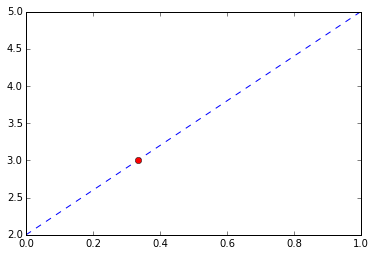

In [123]:
plt.plot([0, 1], [2, 5], '--')
t = 1.0 / 3
vt = noise.lerp(2, 5, t)
plt.plot(t, vt, 'ro')

### smoothstep

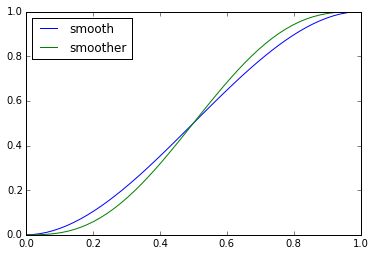

In [124]:
x = np.linspace(0, 1.0)
y1 = noise.ss3(x)
y2 = noise.ss5(x)
plt.plot(x, y1, label="smooth")
plt.plot(x, y2, label="smoother")
plt.legend(loc=2)

### vectors

In [43]:
class Vector:
    def __init__(self, *components):
        self.components = np.array(components)
        
    def mag(self):
        return np.sqrt(sum(self.components**2))
        
    def __len__(self):
        return len(self.components)
    
    def __iter__(self):
        for c in self.components:
            yield c

### seeding

In [55]:
np.random.ranf((2,3,2,2)) # seed in n-dimensions

array([[[[ 0.91200336,  0.85159858],
         [ 0.81503769,  0.46688876]],

        [[ 0.98674254,  0.91433932],
         [ 0.60109046,  0.31178396]],

        [[ 0.43478428,  0.64746049],
         [ 0.71093305,  0.51324364]]],


       [[[ 0.09238   ,  0.84061031],
         [ 0.5824398 ,  0.715719  ]],

        [[ 0.90345006,  0.68416411],
         [ 0.11134773,  0.39978188]],

        [[ 0.7677543 ,  0.09286739],
         [ 0.61144014,  0.07350348]]]])

### noise field

For instance, to create a hypercube of noise we could do something like this:

In [126]:
c4 = noise.Field(d=(8,8,8,8), seed = 5)

We can plot any course through this field, for example:

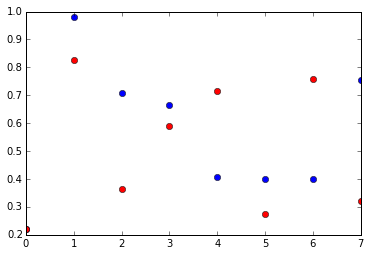

In [127]:
q = np.arange(0, 8)
x = [c4(x, 0, 0, 0) for x in q]
y = [c4(0, y, 0, 0) for y in q]
plt.plot(q, x, 'bo')
plt.plot(q, y, 'ro')